In [8]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
representations = {'single_rgb': 'RGB frame',
                   'gray_pair' : 'Grayscale pair',
                   'rgbdiff'   : 'RGB difference',
                   'flow'      : 'Optical flow',
                   'gray_flow' : 'Grayscale + opt. flow',
                   'stack_flow': 'Stacked opt. flow'}

In [88]:
def generate_df(problem):
    df_list = list()
    for repr_key in representations.keys():
        base_dir = os.path.join('..','results',f'epochs_{problem}',repr_key)
        for fname in os.listdir(base_dir):
            mtc = re.match('.*split_(\d)_\D+_(\D+)\-\D+-.*',fname)
            split = mtc.groups()[0]
            train_val = mtc.groups()[1]
            df_ = pd.read_csv(os.path.join(base_dir,fname))
            df_['Representation'] = representations[repr_key]
            df_['Split'] = split
            df_['Set'] = train_val
            df_.drop('Wall time', axis=1, inplace=True)
            df_list.append(df_)
    df_absolute = pd.concat(df_list)
    df_absolute.rename(columns={'Step': 'Epoch'}, inplace=True)
    return df_absolute

In [100]:
def plot_epochs(problem):
    df = generate_df(problem)
    fig,axs = plt.subplots(ncols=3,nrows=2,figsize=(8,5),sharey=True)
    for i,key in enumerate(representations.keys()):
        ax=axs[i//3,i%3]
        df_ = df[df['Representation']==representations[key]]
        sns.lineplot(data=df_,ax=ax,x='Epoch',y='Value',hue='Set')
        ax.set_ylim(0,20)
        ax.set_title(representations[key])
        ax.set_ylabel('Loss')
        if i!=3:
            ax.legend().set_visible(False)
        if i<3:
            ax.set_xlabel('')
    fig.tight_layout()
    fig.savefig(os.path.join('..','results',f'epochs_{problem}.pdf'))

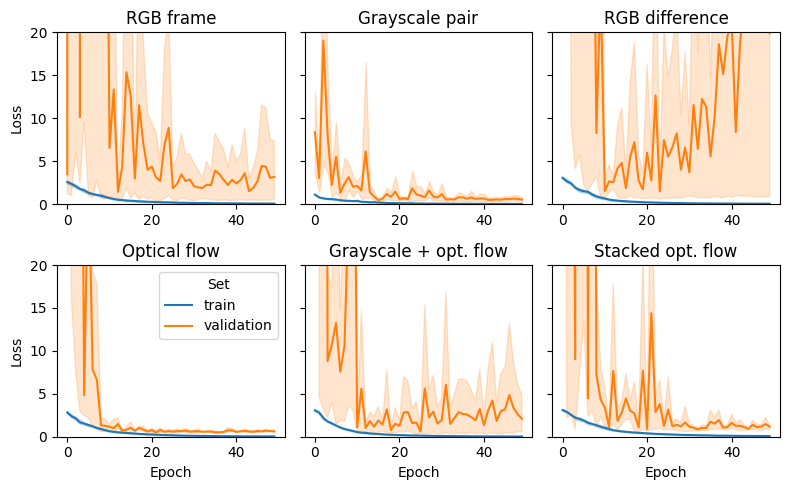

In [101]:
plot_epochs('absolute')

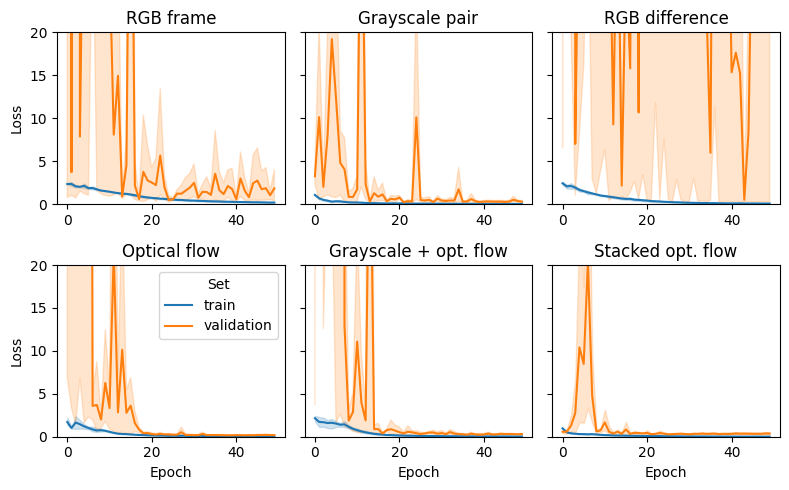

In [102]:
plot_epochs('relative')